In [11]:
import pandas as pd
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report
import matplotlib.pyplot as plt
import seaborn as sns

In [12]:
file_path = "/kaggle/input/logistic/cleaned_diabetes_dataset.csv"
df = pd.read_csv(file_path)

In [13]:
df = df.drop(columns=["ID", "No_Pation"])

In [14]:
label_encoders = {}
for col in ["Gender", "CLASS"]:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])
    label_encoders[col] = le

In [16]:
X = df.drop(columns=["CLASS"])
y = df["CLASS"]


In [19]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [21]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2 )


In [22]:
logreg = LogisticRegression(multi_class='ovr', solver='lbfgs', max_iter=1000)
logreg.fit(X_train, y_train)

LogisticRegression(max_iter=1000, multi_class='ovr')

In [23]:
y_pred = logreg.predict(X_test)


In [24]:
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)

print(f"Accuracy: {accuracy:.2f}\n")
print("Classification Report:\n", report)

Accuracy: 0.93

Classification Report:
               precision    recall  f1-score   support

           0       0.72      0.95      0.82        22
           1       0.00      0.00      0.00        10
           2       0.96      0.98      0.97       168

    accuracy                           0.93       200
   macro avg       0.56      0.64      0.60       200
weighted avg       0.89      0.93      0.91       200



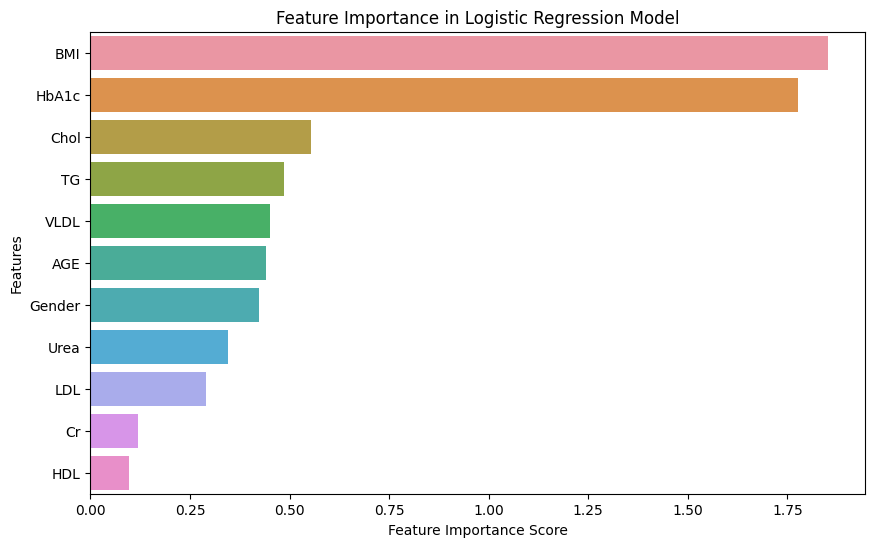

In [25]:
feature_importances = abs(logreg.coef_).mean(axis=0)
feature_importance_df = pd.Series(feature_importances, index=X.columns).sort_values(ascending=False)

plt.figure(figsize=(10, 6))
sns.barplot(x=feature_importance_df, y=feature_importance_df.index)
plt.xlabel("Feature Importance Score")
plt.ylabel("Features")
plt.title("Feature Importance in Logistic Regression Model")
plt.show()